# <font color='green'>  Reminder of Random Variablesb I</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Spring 2024<br>
Course: Performance Evaluation of Computer Systems<br>
Instructor: Dr. Ahmad Khonsari<br>
</div>

# <span style="color:purple">Importing Required Packages</span>

In [ ]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
import random
from scipy import integrate
from scipy.special import factorial
from math import e
from random import randrange
%matplotlib inline

### 4. Random variables (is nor random nor variable)
#### Basic notes:
• events: sets of outcomes of the experiment;
• in many experiments we are interested in some number associated with the experiment:
• __random variable:__ function which associates a number with experiment.
#### Examples:
• number of voice calls N that exists at the switch at time t:
- random variable which takes on integer values in (0,1, … , ∞).

• service time ts of voice call at the switch:
- random variable which takes on any real value (0, ∞).

__Classification based on the nature of RV:__

• continuous: R ∈ (−∞, ∞)

• discrete:N ∈ {0,1, …} , Z ∈ {… , −1,0,1, … }.
***

**Example: Service Time of Voice Calls (Continuous Random Variable)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def plot_poisson(lambda_calls):
    num_calls = np.random.poisson(lambda_calls, 1000)
    plt.hist(num_calls, bins=range(0, 25), alpha=0.75, edgecolor='black')
    plt.title("Number of Voice Calls")
    plt.xlabel("Number of Calls")
    plt.ylabel("Frequency")
    plt.show()

def plot_exponential(lambda_service):
    service_times = np.random.exponential(1 / lambda_service, 1000)
    plt.hist(service_times, bins=30, alpha=0.75, edgecolor='black')
    plt.title("Service Time of Voice Calls")
    plt.xlabel("Service Time")
    plt.ylabel("Frequency")
    plt.show()

interact(plot_poisson, lambda_calls=(1, 20, 1))
interact(plot_exponential, lambda_service=(0.1, 1.0, 0.1))


interactive(children=(IntSlider(value=10, description='lambda_calls', max=20, min=1), Output()), _dom_classes=…

interactive(children=(FloatSlider(value=0.5, description='lambda_service', max=1.0, min=0.1), Output()), _dom_…

<function __main__.plot_exponential(lambda_service)>

### 4.1. Definitions (measure theoretic)
__Definition:__ a real valued RV X is a mapping from Ω to ℜ such that:

\begin{equation}
\{ w \in \Omega: X(\omega) \leq x \} \in \mathcal{F} \text{ for all } x \in \mathbb{R}
\end{equation}
• for all 𝑥 ∈ 𝑅;

__Definition:__ an integer valued RV X is a mapping from Ω to ℵ such that:

\begin{equation}
\{ w \in \Omega: X(\omega) \leq x \} \in \mathcal{F} \text{ for all } x \in \mathbb{R}
\end{equation}
• for all 𝑥 ∈ 𝑍;

__Note!__ in teletraffic and queuing theories:
- most RVs are time intervals, number of channels, packets etc.
- continuous: (0, ∞), discrete: 0,1,….
***

### 4.1. Definitions Random Variable (classic)
- We are often more interested in a some number associated with the experiment rather than the outcome itself.
- __Example 1.__ The number of heads in tossing coin rather than the sequence of heads/tails

A real-valued random variable X is a mapping
\begin{equation}
X: \delta \rightarrow \mathcal{R}
\end{equation}
which associates the real number X(e) to each outcome e ∈ 𝒮.

- __The image of a random variable X__
\begin{equation}
\delta_X = \{ x \in \mathcal{R} | X(\mathcal{e}) = x, \mathcal{e} \in \delta \} \text{ (complete set of values X can take)}
\end{equation}
- may be finite or countably infinite: discrete random variable : 0,1,….
- uncountably infinite: continuous random variable : (0, ∞)
***

In [ ]:
# input number of fair coin you want to toss
n = 10

#tossing coins
head = 0
for i in range(n):
    output = random.randrange(2)
    if (output == 0):
        head += 1
print("number of head in tossing", n, "coin is:", head)

number of head in tossing 10 coin is: 6


***
### 4.1. Definitions Random Variable (classic)
- __Example 2.__ The number of heads in three consecutive tossings of a coin (head = h, tail=t).

| e | X(e) |
| --- | --- |
| hhh | 3 |
| hht | 2 |
| hth | 2 |
| htt | 1 |
| thh | 2 |
| tht | 1 |
| tth | 1 |
| ttt | 0 |

- The values of X are “drawn” by “drawing” e
- e represents a “lottery ticket”, on which the value of X is written
- __Note!__
- in teletraffic and queuing theories: most RVs are time intervals, number of channels, packets etc.
***

### 4.2. Full descriptors(PDF, pdf, pmf)
Definition: the probability that a random variable X is not greater than

\begin{equation}
x: Pr \{ X \leq x \} = \text{probability of Event} \{X \leq x \} = \text{ function of x} = F_X(x) \: (-\infty \leq x \leq \infty)
\end{equation}

is called probability (cumulative) distribution function (PDF, CDF) of X.

__Definition:__ complementary (cumulative) probability distribution
function (CDF, CCDF)

\begin{equation}
F^c(x) = Pr \{ X > x \} = 1 - F(x) = G(x)
\end{equation}

__Note:__ _Not_ All Continuous Random Variables Have PDFs , e.g. _Cantor set_
***

#### Cumulative Distribution Function
**Example**
1. **PDF (Probability Density Function)**:
- The PDF describes the likelihood of the random variable taking on a specific value. For a uniform distribution between 0 and 2, the PDF is constant at 0.5 within this interval and 0 outside it.
- Mathematically:
$$ f_X(x) = \begin{cases}
0.5 & 0 \leq x \leq 2 \\
0 & \text{otherwise}
\end{cases} $$
2. **CDF (Cumulative Distribution Function)**:
- The CDF describes the probability that the random variable $ X $ is less than or equal to a certain value $ x $. For a uniform distribution between 0 and 2, the CDF is a piecewise linear function that starts at 0, increases linearly to 1, and remains 1 beyond 2.
- Mathematically:
$$ F_X(x) = \begin{cases}
0 & x < 0 \\
0.5x & 0 \leq x \leq 2 \\
1 & x > 2
\end{cases} $$

**Cumulative Distribution Function
-Example-**

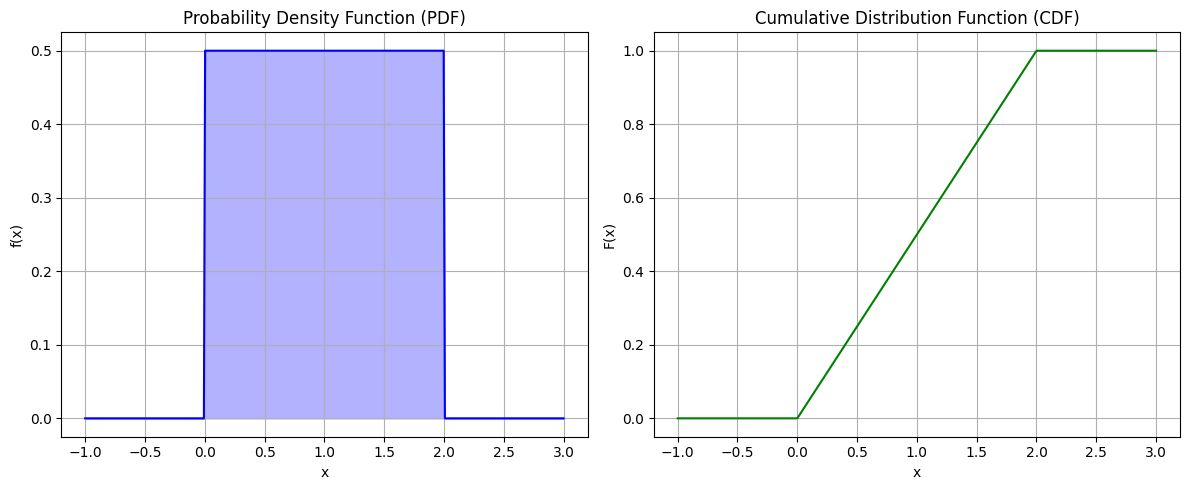

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PDF of a uniform distribution
def pdf_uniform(x):
    return 0.5 * (0 <= x) * (x <= 2)

# Define the CDF of a uniform distribution
def cdf_uniform(x):
    return np.where(x < 0, 0, np.where(x <= 2, 0.5 * x, 1))

# Generate a range of x values
x_values = np.linspace(-1, 3, 400)

# Calculate the PDF and CDF values
pdf_values = pdf_uniform(x_values)
cdf_values = cdf_uniform(x_values)

# Plot the PDF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_values, pdf_values, label='PDF', color='blue')
plt.fill_between(x_values, pdf_values, alpha=0.3, color='blue')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# Plot the CDF
plt.subplot(1, 2, 2)
plt.plot(x_values, cdf_values, label='CDF', color='green')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)

plt.tight_layout()
plt.show()


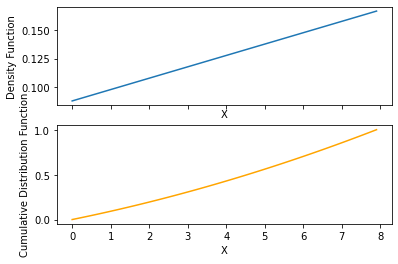

In [ ]:
# input x here:
X = 4

# define your function
def f(t):
    return 0.01*t + 0.088


# delta = 0.025
# xrange = np.arange(-5, 15, delta)
# yrange = np.arange(-5, 15, delta)
# xis, yis = np.meshgrid(xrange, yrange)

t1 = np.arange(0.0, 8, 0.1)
fig, ax = plt.subplots(2, 1, sharex=True)

temp = np.vectorize(lambda t: f(t))
y = temp(t1)
ax[0].plot(t1, y)

x = np.arange(0.0, X, 0.01)
y1 = temp(x)
# ax[0].fill_between(x, 0, y1)
ax[0].set_ylabel('Density Function')
ax[0].set_xlabel('X')

intergration_list = t1.copy()
integ = lambda t: integrate.quad(f,0 , t)[0]
vfunc = np.vectorize(integ)
result = vfunc(t1)

ax[1].set_ylabel('Cumulative Distribution Function')
ax[1].set_xlabel('X')
ax[1].plot(t1, result, color = "orange")
# ax[1].fill_between(x, 0, vfunc(x), color = "orange")
plt.show()

### 4.3. Properties of PDF
__For PDF the following properties holds:__
- PDF F(x) is monotone and non-decreasing with:
\begin{equation}
F(-\infty ) = 0,\: F(\infty) = 1, \: 0 \leq F(x) \leq 1
\end{equation}
- for any a < b:
\begin{equation}
Pr\{ a < x \leq b\} = F(b) - F(a)
\end{equation}
- right continuity: if F(x) is __discontinuous__ at x = a, then:
\begin{equation}
F(a) = F(a - 0) + Pr\{X = a\}
\end{equation}

- If X is continuous:
\begin{equation}
F(x) =  \int^x_{-\infty} F(y)dy
\end{equation}
• __Definition:__ if X is a continuous RV, and F(x) is differentiable, then:
\begin{equation}
f(x) =  \frac{dF(x)}{dx} = \lim_{dx \to 0} \frac{Pr{𝑥 < X \leq x + dx}}{dx}
\end{equation}
is called _probability density function_ (__pdf__).


- X is discrete:
\begin{equation}
F(x) =  \sum_{j \leq x} Pr \{ X = j\}
\end{equation}
__Note:__ if X is discrete RV it is often preferable to deal with pmf (probability mass function) instead of PDF.
***

### Normal and Exponential Distribution Simulation Example


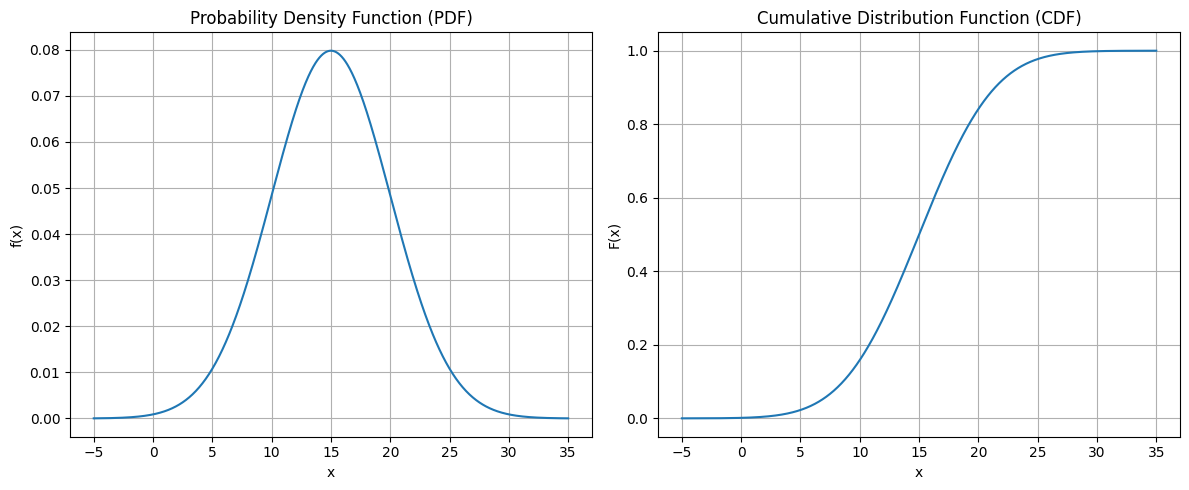

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 15
sigma = 5

# Generate values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = norm.pdf(x, mu, sigma)
cdf = norm.cdf(x, mu, sigma)

# Plot PDF and CDF
plt.figure(figsize=(12, 5))

# PDF
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label='PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label='CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)

plt.tight_layout()
plt.show()


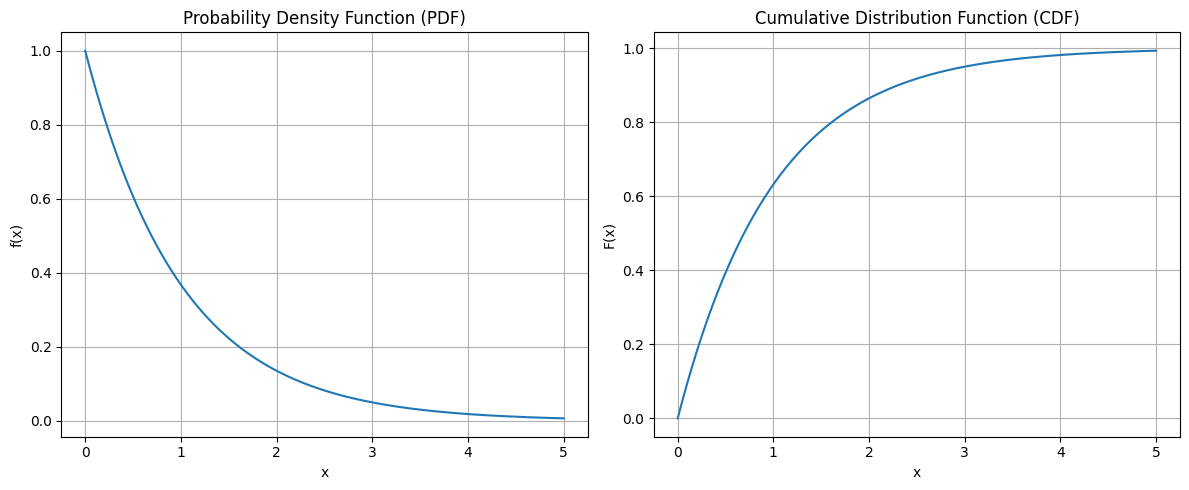

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
lambda_expon = 1

# Generate values
x = np.linspace(0, 5, 1000)
pdf = expon.pdf(x, scale=1/lambda_expon)
cdf = expon.cdf(x, scale=1/lambda_expon)

# Plot PDF and CDF
plt.figure(figsize=(12, 5))

# PDF
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label='PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label='CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)

plt.tight_layout()
plt.show()


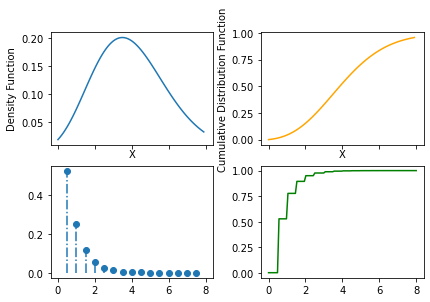

In [ ]:
# define your continuous function
def f(t):
    #I define poisson with mean = 4
    mean = 4
    res = ((mean**t)*(e**(-mean)))/(factorial(t))
    return res

# define your discrete function
def g(t):
    #I define exponential
    ex_pdf_1_5 = 0.745*(1.5 * (e ** (-1.5 * t)))
    return (ex_pdf_1_5)

def CDF(list):
    cumulative = 0
    result = []
    for i in list:
        cumulative += i
        result.append(cumulative)
    return (result)

def descrete_CDF (data, probability):
    CDF =[]
    x_start = 0
    x_end = 8
    x = np.linspace(x_start, x_end, 100)
    cu_value = []
    cu = 0
    for i in probability:
        cu += i
        cu_value.append(cu)
    for i in x:
        if i < data[0]:
            CDF.append(0)
        elif i > data[-1]:
            CDF.append(cu_value[-1])
        else:
            for j in range(1, len(data)):
                if i < data[j]:
                    CDF.append(cu_value[j-1])
                    break
    return x, CDF

# delta = 0.025
# xrange = np.arange(-5, 15, delta)
# yrange = np.arange(-5, 15, delta)
# xis, yis = np.meshgrid(xrange, yrange)

t1 = np.arange(0.0, 8, 0.1)
fig, ax = plt.subplots(2, 2, sharex=True)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
fig.tight_layout()

temp = np.vectorize(lambda t: f(t))
y = temp(t1)
ax[0, 0].plot(t1, y)

ax[0, 0].set_ylabel('Density Function')
ax[0, 0].set_xlabel('X')

intergration_list = t1.copy()
integ = lambda t: integrate.quad(f,0 , t)[0]
vfunc = np.vectorize(integ)
result = vfunc(t1)

ax[0, 1].set_ylabel('Cumulative Distribution Function')
ax[0, 1].set_xlabel('X')
ax[0, 1].plot(t1, result, color = "orange")

dots = np.arange(0.5, 8, 0.5)
temp = np.vectorize(lambda t: g(t))



y2 = temp(dots)
ax[1, 0].stem(dots, y2, '-.', use_line_collection= True, basefmt=" ")

# print(CDF(y2))
x, y = descrete_CDF(dots, y2)
ax[1, 1].plot(x, y, color = "green")

plt.show()

###  Discrete Distribution: PMF and CDF


<ipython-input-8-c51d5415d793>:15: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, probabilities, use_line_collection=True)


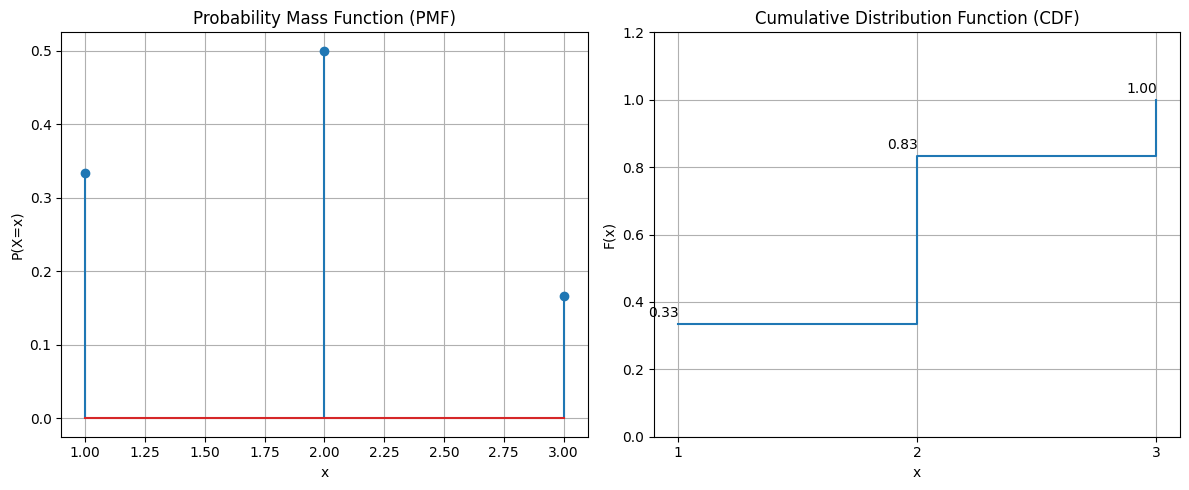

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the discrete values and their probabilities
x = np.array([1, 2, 3])
probabilities = np.array([1/3, 1/2, 1/6])

# Calculate the CDF
cdf = np.cumsum(probabilities)

# Plot the PMF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(x, probabilities, use_line_collection=True)
plt.title('Probability Mass Function (PMF)')
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.grid(True)

# Plot the CDF
plt.subplot(1, 2, 2)
plt.step(x, cdf, where='post', label='CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.ylim(0, 1.2)
plt.xticks(x)
plt.grid(True)

# Annotate the CDF plot to match the provided image
for i, val in enumerate(x):
    plt.annotate(f'{cdf[i]:.2f}', (val, cdf[i]), textcoords="offset points", xytext=(-10,5), ha='center')

plt.tight_layout()
plt.show()


***
### 4.4. Discrete RVs


**Discrete RV Simulation**

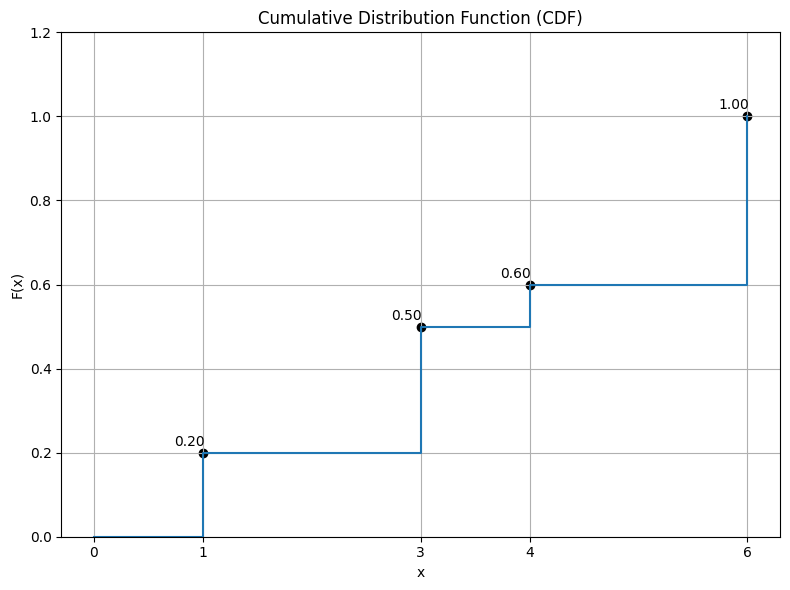

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the discrete values and their probabilities
x_values = np.array([1, 3, 4, 6])
probabilities = np.array([0.2, 0.3, 0.1, 0.4])

# Calculate the CDF
cdf = np.cumsum(probabilities)

# Plot the CDF with steps
plt.figure(figsize=(8, 6))
plt.step(np.insert(x_values, 0, x_values[0] - 1), np.insert(cdf, 0, 0), where='post')
plt.scatter(x_values, cdf, color='black')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.ylim(0, 1.2)
plt.xticks(np.append(x_values, [x_values[0] - 1]))
plt.grid(True)

# Annotate the CDF plot to show the cumulative probabilities
for i, val in enumerate(x_values):
    plt.annotate(f'{cdf[i]:.2f}', (val, cdf[i]), textcoords="offset points", xytext=(-10,5), ha='center')

plt.tight_layout()
plt.show()


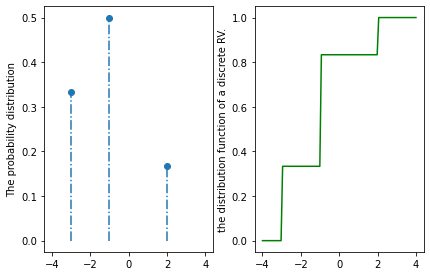

In [ ]:
#Import your data and the probabilities here
data = [-3, -1, 2]
probability = [1/3, 1/2, 1/6]

descrete_CDF(data, probability)


- **Definition**: Let the values that can be assumed by $X$ be $x_k$ , $k = 0, 1, 2, . . .$
- The distribution function will have the staircase
- The steps occur at each $x_k$ and have size $P(X = x_k)$.

Figure 3 (above example) shows a discrete distribution function. A discrete distribution function has a finite number of discontinuities. The random variable has a nonzero probability only at the points of discontinuity.
![image.png](attachment:image.png)
***

CDF and pdf of discrete case:

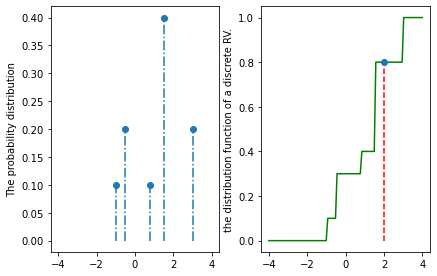

In [ ]:
#Import your data and the probabilities here
x = [-1, -0.5, 0.8, 1.5, 3]
p = [0.1, 0.2, 0.1, 0.4, 0.2]

descrete_CDF(x, p, True, 2)


\begin{equation}
F_X(x) = Pr\{ X \leq x \} = \sum_{j \leq x} Pr \{ x=j \} =  \sum_{j \leq x}^{N} Pr \{ x=j \} u(x - x_j) = \sum_{j \leq x}^{N} Pr(x_j - x_j)
\end{equation}

where $p(x_j)$ is a shorthand for $Pr \{ x = x_j \}$

__note:__  accumulates up to $x_j$ , and not to $N$

***
### 4.4. Discrete RVs (_pdf _)
\begin{equation}
f_X(x) = \frac{F_X(x)}{dx} =  \sum_{j \leq x}^{N} Pr \{ x=j \} \frac{du(x - x_j)}{dx} = \sum_{j \leq x}^{N} Pr \{ x=j \} \delta (x - x_j) = \sum_{j \leq x}^{N} Pr(x_j)\delta (x - x_j) = Pr(x_j) \text{ for j = 1, ..., N}
\end{equation}

***

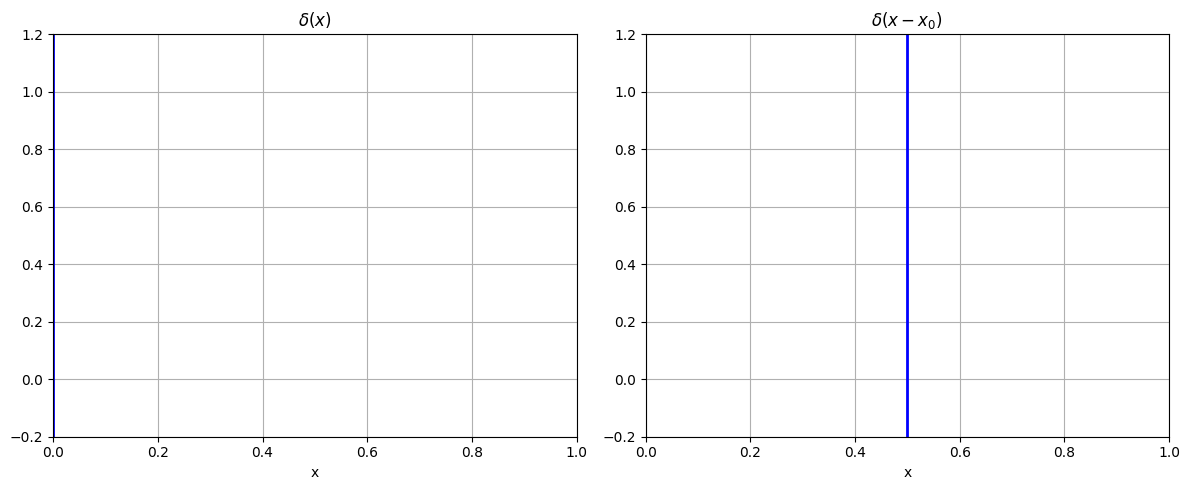

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 400)
x0 = 0.5

plt.figure(figsize=(12, 5))

# Delta function at x = 0
plt.subplot(1, 2, 1)
plt.axvline(x=0, color='b', linestyle='-', linewidth=2)
plt.ylim(-0.2, 1.2)
plt.title(r'$\delta(x)$')
plt.xlabel('x')
plt.grid(True)

# Delta function at x = x0
plt.subplot(1, 2, 2)
plt.axvline(x=x0, color='b', linestyle='-', linewidth=2)
plt.ylim(-0.2, 1.2)
plt.title(r'$\delta(x - x_0)$')
plt.xlabel('x')
plt.grid(True)

plt.tight_layout()
plt.show()


**PMF**

<ipython-input-12-fdc6387f34c6>:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x_values, probabilities, use_line_collection=True)


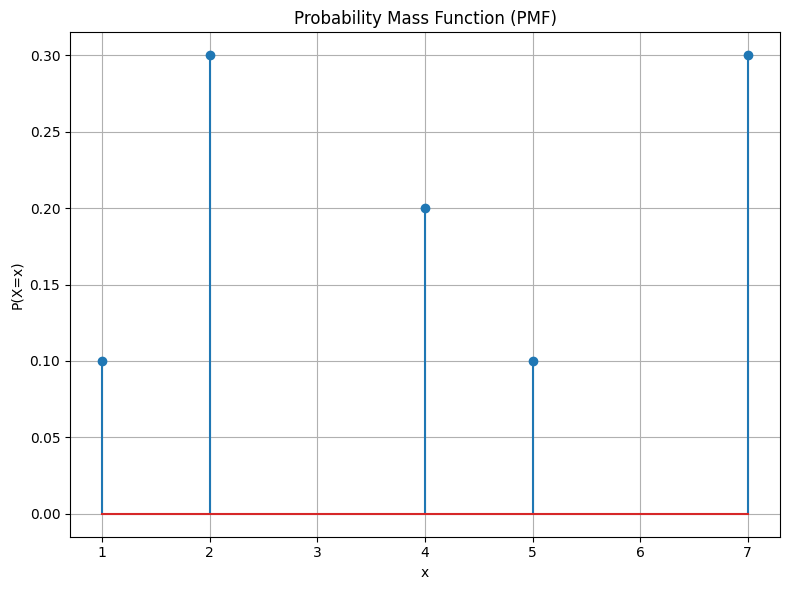

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the discrete values and their probabilities
x_values = np.array([1, 2, 4, 5, 7])
probabilities = np.array([0.1, 0.3, 0.2, 0.1, 0.3])

# Plot the PMF with spikes
plt.figure(figsize=(8, 6))
plt.stem(x_values, probabilities, use_line_collection=True)
plt.title('Probability Mass Function (PMF)')
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.grid(True)

plt.tight_layout()
plt.show()


**Q: What is the PMF of a discrete RV?**

**A:**
The probability mass function (PMF) of a discrete random variable $ X $ is a function that gives the probability that $ X $ takes on a specific value. Mathematically, it is defined as:

$$ P(X = x) $$

where $ P(X = x) $ represents the probability that the random variable $ X $ equals $ x $. The PMF is only defined for discrete random variables and sums to 1 over all possible values of $ X $.

### 4.5. More Properties of pdf (continuous RV)
- pdf f(x) non-negative:
\begin{equation}
f_X(x) \geq 0, \: x \in (- \infty, + \infty)
\end{equation}

- if f(x) is integrable then for any $x_1 < x_2$:
\begin{equation}
Pr \{x_1 < x=j \leq x_2 \} = F(x_2) - F(x_1) = \int^{x_2}_{x_1} f_X(x)dx
\end{equation}


\begin{equation}
F_X(x_0) = \int^{x_0}_{- \infty } f_X(x)dx
\end{equation}


- integration to 1:
\begin{equation}
\int^{+ \infty}_{- \infty } f_X(x)dx = 1
\end{equation}

__Note:__ all these properties hold for pmf (you have to replace integral by sum).

***

Lets define a custom PDF, verifies its validity by integrating it to check it sums to 1, calculates probabilities and the CDF, and plots the PDF and CDF. It also calculates the mean and variance of the distribution.

Integral of PDF over its range: 1.0
P(-0.5 <= X <= 0.5): 0.6875


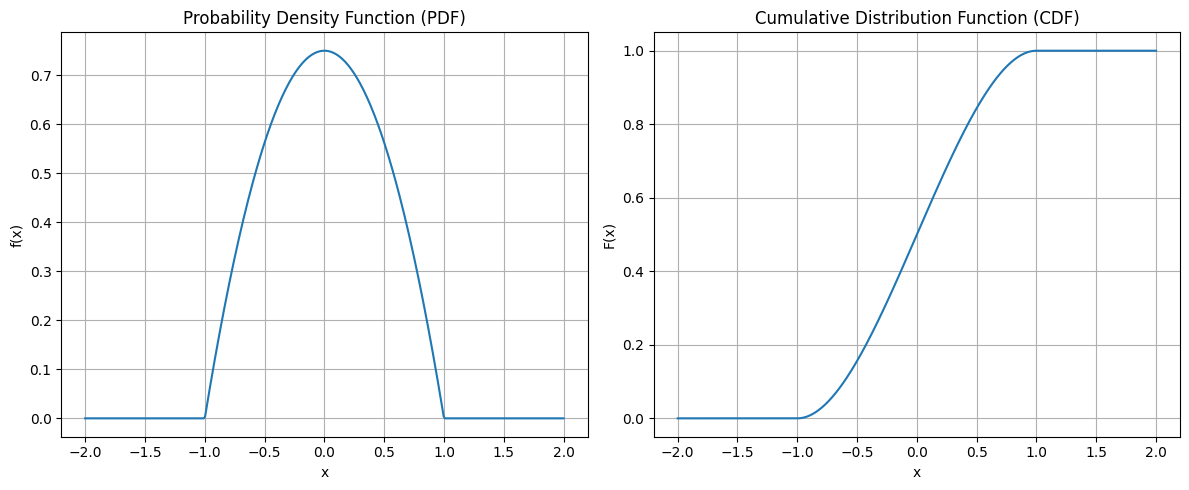

Mean (μ) of X: 0.0
Variance (σ^2) of X: 0.19999999999999996


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the PDF
def pdf(x):
    return 0.75 * (1 - x**2) * (np.abs(x) <= 1)

# Verify the PDF integrates to 1
integral, _ = quad(pdf, -np.inf, np.inf)
print(f"Integral of PDF over its range: {integral}")

# Calculate the probability that X lies between -0.5 and 0.5
prob, _ = quad(pdf, -0.5, 0.5)
print(f"P(-0.5 <= X <= 0.5): {prob}")

# Define the CDF by integrating the PDF
def cdf(x):
    if x < -1:
        return 0
    elif x > 1:
        return 1
    else:
        result, _ = quad(pdf, -1, x)
        return result

# Generate values for plotting
x_values = np.linspace(-2, 2, 400)
pdf_values = pdf(x_values)
cdf_values = [cdf(x) for x in x_values]

# Plot the PDF and CDF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_values, pdf_values, label='PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_values, cdf_values, label='CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate the mean
mean, _ = quad(lambda x: x * pdf(x), -np.inf, np.inf)
print(f"Mean (μ) of X: {mean}")

# Calculate the variance
variance, _ = quad(lambda x: (x - mean)**2 * pdf(x), -np.inf, np.inf)
print(f"Variance (σ^2) of X: {variance}")


**Q: What does $ f(x) $ mean?**

**A:** $ f(x) $ represents the probability density function (PDF) of a continuous random variable $ X $. It describes the relative likelihood of $ X $ taking on a particular value $ x $. The PDF satisfies the properties that it is non-negative and integrates to 1 over the entire range of $ X $.


### 4.6. mixed RVs

#### Definition:
X is a continuous RV, and F(x) is differentiable, and with discontinuities at some discrete points:

The first term r.h.s are impulse components and the second is nonimpulse
component

$$
f_X(x) = \sum_{j=1}^{n} p_j \delta (x - x_j) + c_X
$$

$$
\int_{-\infty}^{\infty} f_X(x) \, dx = \int_{-\infty}^{\infty} p_j U(x - x_j) \, dx + \int_{-\infty}^{\infty} c(x) \, dx = 1
$$





**Verify PDF and Calculate CDF, Expected Value, and Variance**

Integral of PDF over its range: 1.3


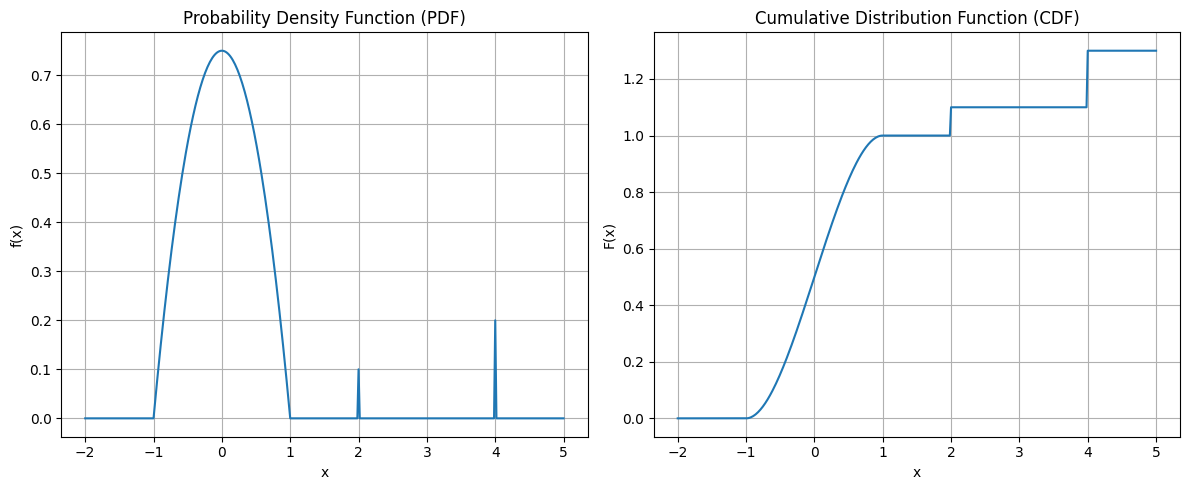

Expected value (E[X]): 1.0
Variance (Var(X)): 3.1


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the continuous component of the PDF
def c_X(x):
    return 0.75 * (1 - x**2) * (np.abs(x) <= 1)

# Define the discrete points and their probabilities
x_j = np.array([2, 4])
p_j = np.array([0.1, 0.2])

# Define the mixed PDF
def f_X(x):
    pdf_continuous = c_X(x)
    pdf_discrete = np.sum([p_j[i] * (x == x_j[i]) for i in range(len(x_j))])
    return pdf_continuous + pdf_discrete

# Verify the PDF integrates to 1
integral_cont, _ = quad(c_X, -np.inf, np.inf)
integral_disc = np.sum(p_j)
integral_total = integral_cont + integral_disc
print(f"Integral of PDF over its range: {integral_total}")

# Define the CDF
def F_X(x):
    cdf_continuous, _ = quad(c_X, -1, min(x, 1))
    cdf_discrete = np.sum([p_j[i] for i in range(len(x_j)) if x_j[i] <= x])
    return cdf_continuous + cdf_discrete

# Generate values for plotting
x_values = np.linspace(-2, 5, 400)
pdf_values = np.array([f_X(x) for x in x_values])
cdf_values = np.array([F_X(x) for x in x_values])

# Plot the PDF and CDF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_values, pdf_values, label='PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_values, cdf_values, label='CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate the expected value
mean_cont, _ = quad(lambda x: x * c_X(x), -np.inf, np.inf)
mean_disc = np.sum(x_j * p_j)
mean_total = mean_cont + mean_disc
print(f"Expected value (E[X]): {mean_total}")

# Calculate the variance
var_cont, _ = quad(lambda x: (x - mean_total)**2 * c_X(x), -np.inf, np.inf)
var_disc = np.sum((x_j - mean_total)**2 * p_j)
var_total = var_cont + var_disc
print(f"Variance (Var(X)): {var_total}")


### 4.7. notes on Full descriptors cntd

<span style="color:red">In what follows we assume integer values for discrete RVs i.e. :</span>

\begin{align}
{{p}_{j}}=\Pr \{X=j\} \\  
\label{eq:2}
\end{align}

Which is also called probability function (PF) or probability mass function pmf.

<span style="color:red">Q: X is a continuous RV with no jump, then $P(X={{X}_{0}})=0$ or If we are ignorant:$p(x\approx {{x}_{0}})={{f}_{X}}({{x}_{0}})|\Delta x|$ since</span>

\begin{align}
P\{{{x}_{0}}<X(\xi )\le {{x}_{0}}+\Delta x\}=\int_{{{x}_{0}}}^{{{x}_{0}}+\Delta x}{{{f}_{X}}(u)du}\approx {{f}_{X}}({{x}_{0}}).\Delta x \\
\label{eq:3}
\end{align}

<span style="color:red">jumps in the CDF correspond to points x for which $P(X=x)>0$ </span>

### 4.8. Parameters of RV
#### Basic notes:
#### Full descriptors (i.e.)

•continuous RV: PDF and pdf give all information regarding properties of RV;

•discrete RV: PDF and pdf( pmf ) give all information regarding properties of
RV.
#### Why we need something else:
•problem 1: PDF, pdf and pmf are sometimes not easy to deal with;

•problem 2: sometimes it is hard to estimate from data;

•solution: use parameters (summaries) of RV.
#### What parameters (summaries):
•mean;

•variance;

•skewness;

•excess (also known as excess kurtosis or simply kurtosis).

### 4.9. Mean
#### Definition:
the mean of RV X is given by:

\begin{equation*}
E[X]=\sum\nolimits_{\forall i}{{{x}_{i}}{{p}_{i}}},E[X]=\int_{-\infty }^{\infty }{xf(x)dx} \\
\label{eq:4} \tag{58}
\end{equation*}

•mean E[X] of RV X is between max and min value of non complex RV:

\begin{equation*}
\underset{k}{\mathop{\min {{x}_{k}}}}\,\le E[x]\le \underset{k}{\mathop{\max {{x}_{k}}}}\,\ \\
\label{eq:5} \tag{59}
\end{equation*}

•mean of the constant is constant:

\begin{equation*}
E[c]=c \\
\label{eq:6} \tag{60}
\end{equation*}

•mean of RV multiplied by constant value is constant value multiplied by the mean:

\begin{equation*}
E[cX]=𝑐E[X] \\
\label{eq:7} \tag{61}
\end{equation*}

•mean of constant and RV X is the mean of X and constant value:

\begin{equation*}
E[c+X]=𝑐+E[X] \\
\label{eq:8} \tag{62}
\end{equation*}

•Linearity of Expectation:

\begin{equation*}
E[{{X}_{1}}+...+{{X}_{n}}]=E[{{X}_{1}}]+...+E[{{X}_{n}}] \\
\label{eq:9}
\end{equation*}

**Descriptors**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Parameters
mu = 0  # mean
sigma = 1  # standard deviation
sample_size = 1000  # number of samples

# Generate random samples from a normal distribution
samples = np.random.normal(mu, sigma, sample_size)

# Calculate the sample statistics
sample_mean = np.mean(samples)
sample_variance = np.var(samples)
sample_skewness = skew(samples)
sample_kurtosis = kurtosis(samples)

# Display results
print(f'Sample Mean: {sample_mean}')
print(f'Sample Variance: {sample_variance}')
print(f'Sample Skewness: {sample_skewness}')
print(f'Sample Kurtosis: {sample_kurtosis}')

# Plotting the histogram
plt.hist(samples, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Normally Distributed Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.axvline(sample_mean, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {sample_mean:.2f}')
plt.axvline(sample_mean + np.sqrt(sample_variance), color='g', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {np.sqrt(sample_variance):.2f}')
plt.axvline(sample_mean - np.sqrt(sample_variance), color='g', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()


### 4.9. Conditional Expectation

The expectation of the random variable X given that another random variable Y takes the value Y = y is

\begin{equation*}
E[X|Y=y]=\int_{-\infty }^{\infty }{x{{f}_{X|Y}}(x,y)dx} \\
\label{eq:10}
\end{equation*}

obtained by using the conditional distribution of X.

E[X|Y=y]is a function of y.


By applying this function on the value of the random variable Y one obtains a random variable $E[X|Y]$ (a function of the random variable Y).

\begin{align}
E[X|Y] &=E[X] \\
E[cX|Y] &=cE[X] \\
E[X+Y|Z] &=E[X|Z]+E[Y|Z] \\
E[g(Y)|Y] &=g(Y) \\
E[g(Y)X|Y] &=g(Y)E[X|Y] \\
\label{eq:11}
\end{align}


### 4.10. Variance and standard deviation
#### Definition:
the mean of the square of difference between RV X and its mean E[X]:

\begin{equation*}
V[X]=E[{{(X-E[X])}^{2}}] \\
\label{eq:12} \tag{63}
\end{equation*}

#### How to compute variance:
•assume that X is discrete, compute variance as:

\begin{equation*}
V[X]=\sum\nolimits_{\forall n}{{{(X-E[X])}^{2}}{{p}_{n}}} \\
\label{eq:13} \tag{64}
\end{equation*}

•assume that X is continuous, compute variance as:

\begin{equation*}
V[X]=\int_{-\infty }^{\infty }{{{(X-E[X])}^{2}}f(x)dx} \\
\label{eq:14} \tag{65}
\end{equation*}

•the another approach to compute variance:

\begin{equation*}
 V[X]=E[{{X}^{2}}]-{{(E[X])}^{2}} \\
 \label{eq:15} \tag{66}
\end{equation*}

### 4.10. cntd. Properties of the variance:
•the variance of the constant value is 0:

\begin{equation*}
V[c]=E[{{(X-E[X])}^{2}}]=E[{{(c-c)}^{2}}]=E[0]=0 \\
\label{eq:16} \tag{67}
\end{equation*}

•variance of RV multiplied by constant value:

\begin{equation*}
V[cX]=E[{{(cX-cE[X])}^{2}}]=E[{{c}^{2}}{{(X-E[X])}^{2}}]={{c}^{2}}V[X] \\
\label{eq:17} \tag{68}
\end{equation*}

•variance of the constant value and RV X:

\begin{equation*}
V[c+X]=E[{{((c+X)-(c+E[X]))}^{2}}]=V[X] \\
\label{eq:18}
\end{equation*}



### 4.10. cntd. Properties of variance (summary):

\begin{equation*}
V[{{X}_{1}}+...+{{X}_{n}}]=V[{{X}_{1}}]+...+V[{{X}_{n}}] \\
\label{eq:19}
\end{equation*}

\begin{equation*}
V[{{X}_{1}}+...+{{X}_{n}}]=\sum\nolimits_{i,j=1}^{n}{\operatorname{cov}[{{X}_{i}},{{X}_{j}}]} \\
\label{eq:20}
\end{equation*}

Proof:

\begin{align}
 V[{{X}_{1}}+...+{{X}_{n}}] \\
 & =E\{\sum\nolimits_{j=1}^{n}{({{X}_{j}}-E({{X}_{j}}))}\sum\nolimits_{k=1}^{n}{({{X}_{k}}-E({{X}_{k}}))}\} \\
 & =\sum\nolimits_{j=1}^{n}{\sum\nolimits_{k=1}^{n}{E\{({{X}_{j}}-E({{X}_{j}}))}({{X}_{k}}-E({{X}_{k}}))\}} \\
 & =\sum\nolimits_{j,k=1}^{n}{\operatorname{cov}[{{X}_{j}},{{X}_{k}}]} \\
 & =\sum\nolimits_{k=1}^{n}{V[{{X}_{k}}]}+\sum\nolimits_{j=1}^{n}{\sum\nolimits_{k=1}^{n}{\operatorname{cov}[{{X}_{j}},{{X}_{k}}]}} \\
\end{align}

Properties of covariance

\begin{equation*}
\operatorname{cov}[X,Y]=\operatorname{cov}[Y,X] \\
\label{eq:21}
\end{equation*}

\begin{equation*}
\operatorname{cov}[X+Y,Z]=\operatorname{cov}[X,Z]+\operatorname{cov}[Y,Z] \\
\label{eq:22}
\end{equation*}

In [ ]:
#Variance:

def variance(x,f):
    a=np.zeros(len(f))
    b=np.zeros(len(f))
    for i in range(0,len(f)):
        a[i]=x[i]*f[i]
        b[i]=x[i]**2*f[i]
    ex=sum(a)
    ex2=sum(b)
    v=ex2-ex**2
    return v;

x=[1, 2, 3, 4, 5]
f=[1/8, 3/8, 1/8, 2/8, 1/8]

v=variance(x,f)
v

1.609375

**Variance of Sum**

Variance of each X_i: [0.99994705 0.99763732 1.04025434 1.01117081 0.98946191 1.00143552
 0.9948607  0.99006797 0.99809311 0.97069011]
Variance of Y (sum of X_i): 10.067018797457518


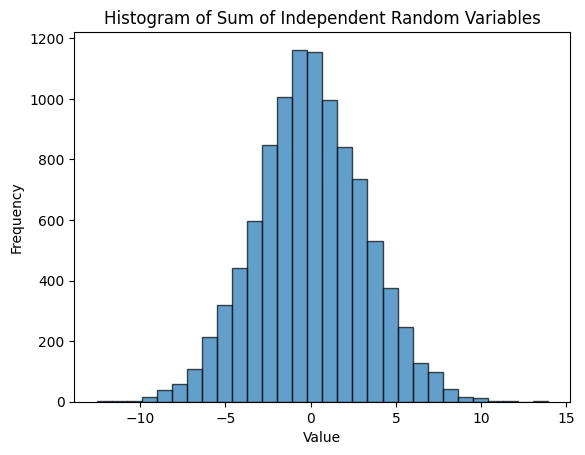

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Number of random variables
n = 10
# Number of samples
samples = 10000

# Generate n independent random variables with mean=0 and variance=1
X = np.random.normal(0, 1, (n, samples))

# Sum of these random variables
Y = np.sum(X, axis=0)

# Variance of each individual X_i
var_X_i = np.var(X, axis=1)
# Variance of the sum Y
var_Y = np.var(Y)

print(f"Variance of each X_i: {var_X_i}")
print(f"Variance of Y (sum of X_i): {var_Y}")

# Plotting
plt.hist(Y, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Sum of Independent Random Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


**Simulation for Covariance of Two Random Variables**

Covariance of X and Y: 0.7933939949014842


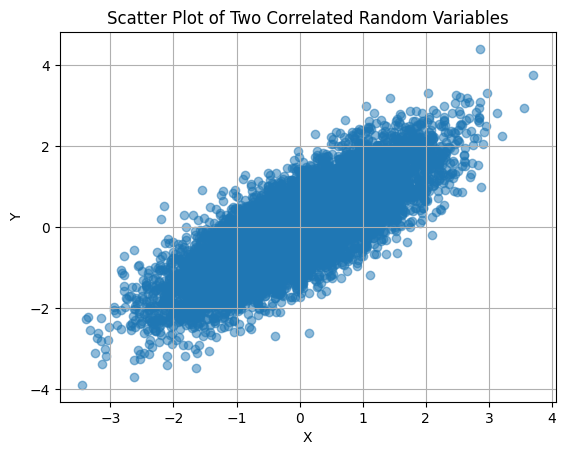

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
samples = 10000

# Generate two correlated random variables
mean = [0, 0]
cov_matrix = [[1, 0.8], [0.8, 1]]  # Diagonal elements are variances, off-diagonal elements are covariances
X, Y = np.random.multivariate_normal(mean, cov_matrix, samples).T

# Calculate the covariance
cov_XY = np.cov(X, Y)[0, 1]

print(f"Covariance of X and Y: {cov_XY}")

# Plotting
plt.scatter(X, Y, alpha=0.5)
plt.title('Scatter Plot of Two Correlated Random Variables')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


### 4.10. cntd. Conditional variance
#### Conditional variance
$V[X|Y]=E[{{(X-E[X|Y])}^{2}}|Y]$ Deviation with respect to the conditionalexpectation

#### Conditional covariance
\begin{equation*}
V[X|Y]=E[{{(X-E[X|Y])}^{2}}|Y]
\label{eq:23}
\end{equation*}

#### Conditioning rules
\begin{align}
E[X]&=E[E[X|Y]] \\
V[X]&=E[V[X|Y]]+V[E[X|Y]] \\
\operatorname{cov}[X,Y]&=E[\operatorname{cov}[X,Y|Z]+\operatorname{cov}[E[X|Z],E[Y|Z]]] \\
\label{eq:24}
\end{align}



**Simulation for Conditional Expectation and Conditional Variance**

Conditional Expectation E[Y|X]: 0.00579414005682217
Conditional Variance Var(Y|X): 0.9986180014114087


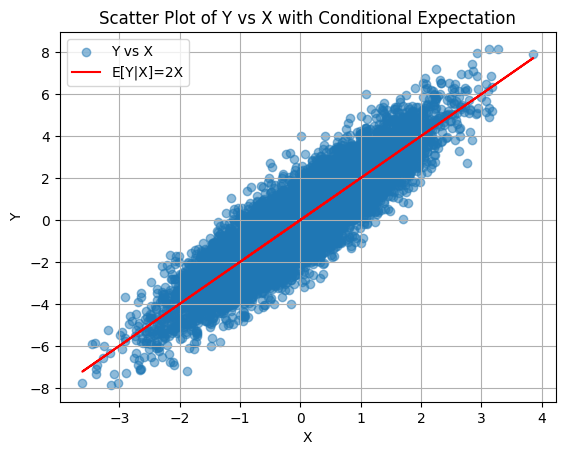

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
samples = 10000

# Generate two random variables
X = np.random.normal(0, 1, samples)
Y = 2 * X + np.random.normal(0, 1, samples)

# Calculate the conditional expectation E[Y|X]
E_Y_given_X = 2 * X

# Calculate the conditional variance Var(Y|X)
var_Y_given_X = np.var(Y - E_Y_given_X)

print(f"Conditional Expectation E[Y|X]: {np.mean(E_Y_given_X)}")
print(f"Conditional Variance Var(Y|X): {var_Y_given_X}")

# Plotting
plt.scatter(X, Y, alpha=0.5, label='Y vs X')
plt.plot(X, E_Y_given_X, color='red', label='E[Y|X]=2X')
plt.title('Scatter Plot of Y vs X with Conditional Expectation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


### 4.11. Other parameters: moments
#### Let us assume the following:

• X be RV (discrete or continuous);

• $k\in 1,2,...$ be the natural number;

• $Y={{X}^{k}},k=1,2,...$, be the set of random variables.

#### Definition:
the mean of RVs Y can be computed as follows:
•assume X is a discrete RV:

\begin{equation*}
E[Y]=\sum\nolimits_{\forall i}{{{x}_{i}}^{k}{{p}_{i}}} \\
\label{eq:25} \tag{71}
\end{equation*}

•assume X is a continuous one.

\begin{equation*}
E[Y]=\int_{-\infty }^{\infty }{{{x}^{k}}{{f}_{X}}(x)dx} \\
\label{eq:26} \tag{72}
\end{equation*}

#### Note:
for example, mean is obtained by setting k = 1.

#### Definition:
(raw) moment of order k of RV X is the mean of RV X in power of:

\begin{equation*}
{{\alpha }_{k}}=E[{{X}^{k}}] \\
\label{eq:27} \tag{73}
\end{equation*}

#### Definition:
central moment (moment around the mean) of order k of RV X is given by:

\begin{equation*}
{{\mu }_{k}}=E[{{(X-E[X])}^{k}}] \\
\label{eq:28} \tag{74}
\end{equation*}

One can note that:

\begin{equation*}
E[X]={{\alpha }_{1}},V[X]=\sigma [X]={{\mu }_{2}}={{\alpha }_{2}}-{{\alpha }_{1}}^{2} \\
\label{eq:29} \tag{75}
\end{equation*}

In [ ]:
#Moment:

def moment(x,k,f):
    a=np.zeros(len(f))
    for i in range(0,len(f)):
        a[i]=x[i]**k*f[i]
    e=sum(a)
    return e;

x=[1, 2, 3, 4, 5]
k=1 #vaqti 1 bashad haman omid ast
f=[1/8, 3/8, 1/8, 2/8, 1/8]

alfa=moment(x,k,f)
alfa

2.875

In [ ]:
#Central Moment:

def central_moment(x,k,f):
    a=np.zeros(len(f))
    b=np.zeros(len(f))
    for i in range(0,len(f)):
        a[i]=x[i]*f[i]
    ex=sum(a)
    for j in range(0,len(f)):
        b[j]=(x[j]-ex)**k*f[j]
    cm=sum(b)
    return cm;

x=[1, 2, 3, 4, 5]
k=2 #vaqti 2 bashad haman variance ast
f=[1/8, 3/8, 1/8, 2/8, 1/8]

mu=central_moment(x,k,f)
mu

1.609375

### measures of shape:
#### Definition:
**skewness** (the degree of symmetry in the variable distribution)of RV is given by:


$$
s_X = \frac{\mu_3}{(\sigma(X))^3} \tag{30}
$$


for unimodal (one peak), skewed to one side (i.e. not symmetric ), If the bulk of the data is at the left and the right tail is longer, we say that the distribution is skewed right or positively skewed and vice versa.



#### Application:
three bandit (robbing your money) with the above distributions; the left distribution is the best Machine in terms of maximizing your net profit.


-0.024100525167008842

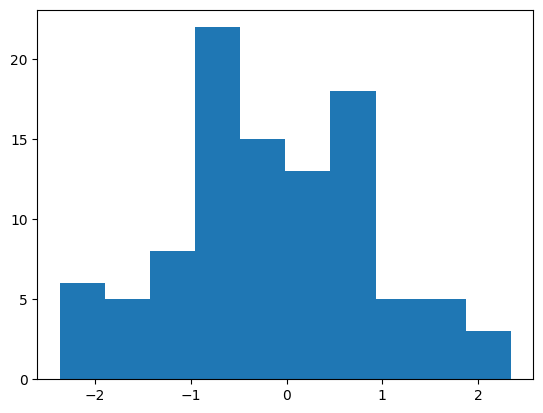

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import scipy

#Skewness:
y=np.random.normal(0, 1, 100)
plt.hist(y)
s=scipy.stats.skew(y)
s

**Simulation for Skewness of Different Distributions**

Normal Distribution Skewness: 0.04213750510380623
Positively Skewed Distribution Skewness: -0.543647269284914
Negatively Skewed Distribution Skewness: 0.52522013088387


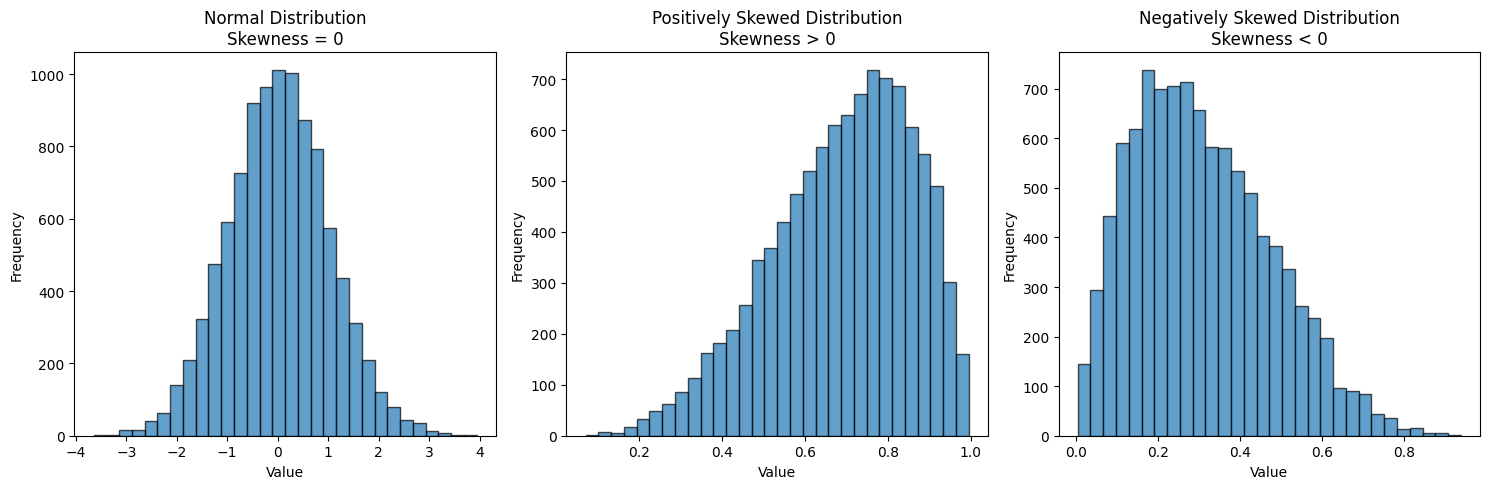

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, beta

# Number of samples
samples = 10000

# Generate data for different distributions
normal_data = np.random.normal(0, 1, samples)  # Normal distribution
left_skewed_data = beta.rvs(4.5, 2, size=samples)  # Positively skewed distribution
right_skewed_data = beta.rvs(2, 4.5, size=samples)  # Negatively skewed distribution

# Calculate skewness
normal_skewness = skew(normal_data)
left_skewed_skewness = skew(left_skewed_data)
right_skewed_skewness = skew(right_skewed_data)

print(f"Normal Distribution Skewness: {normal_skewness}")
print(f"Positively Skewed Distribution Skewness: {left_skewed_skewness}")
print(f"Negatively Skewed Distribution Skewness: {right_skewed_skewness}")

# Plotting the histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(normal_data, bins=30, edgecolor='black', alpha=0.7)
plt.title('Normal Distribution\nSkewness = 0')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(left_skewed_data, bins=30, edgecolor='black', alpha=0.7)
plt.title('Positively Skewed Distribution\nSkewness > 0')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(right_skewed_data, bins=30, edgecolor='black', alpha=0.7)
plt.title('Negatively Skewed Distribution\nSkewness < 0')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Beta Skewness**

Beta(α=4.5, β=2) skewness = -0.5656


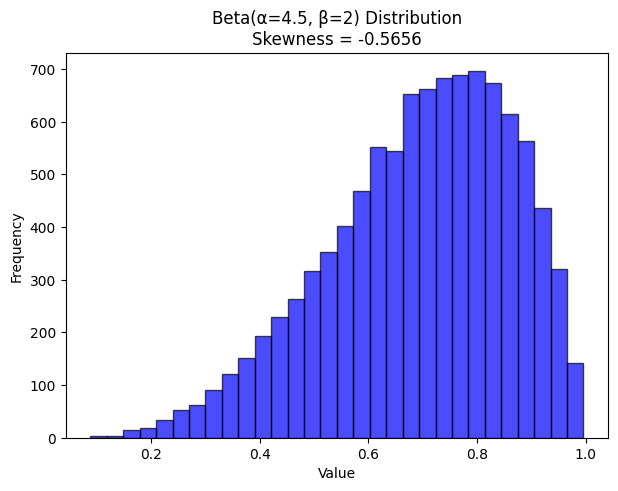

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, skew

# Parameters for the Beta distribution
alpha, beta_param = 4.5, 2

# Number of samples
samples = 10000

# Generate Beta distribution data
beta_data = beta.rvs(alpha, beta_param, size=samples)

# Calculate skewness
beta_skewness = skew(beta_data)

print(f"Beta(α={alpha}, β={beta_param}) skewness = {beta_skewness:.4f}")

# Plotting the histogram
plt.figure(figsize=(7, 5))
plt.hist(beta_data, bins=30, edgecolor='black', alpha=0.7, color='blue')
plt.title(f'Beta(α={alpha}, β={beta_param}) Distribution\nSkewness = {beta_skewness:.4f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


**Definition:** **Kurtosis** (excess of kurtosis) of a random variable (RV) is given by:
$$ e_X = \frac{\mu_4}{(\sigma[X])^4} $$
the degree of tailedness in the variable distribution (Westfall 2014).

Increasing kurtosis is associated with the "movement of probability mass from the shoulders of a distribution into its center and tails."

**Uniform(min=-√3, max=√3)**
- Kurtosis = 1.8, excess = -1.2

**Types of Distributions:**
1. **Platykurtic Distribution**
    - Thinner tails
    - Kurtosis < 0
2. **Normal Distribution**
    - Mesokurtic distribution
    - Kurtosis = 0
3. **Leptokurtic Distribution**
    - Fatter tails
    - Kurtosis > 0

-1.1266568506505545

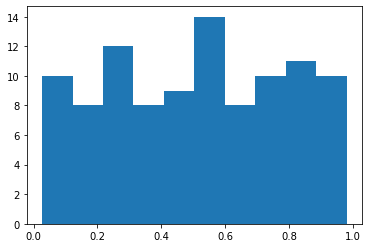

In [ ]:
#Excess:
y=np.random.uniform(0,1,100)
plt.hist(y)
e=scipy.stats.kurtosis(y)
e

**Kurtosis of Uniform**

Uniform(min=-1.73, max=1.73) kurtosis = 1.8, excess = -1.2


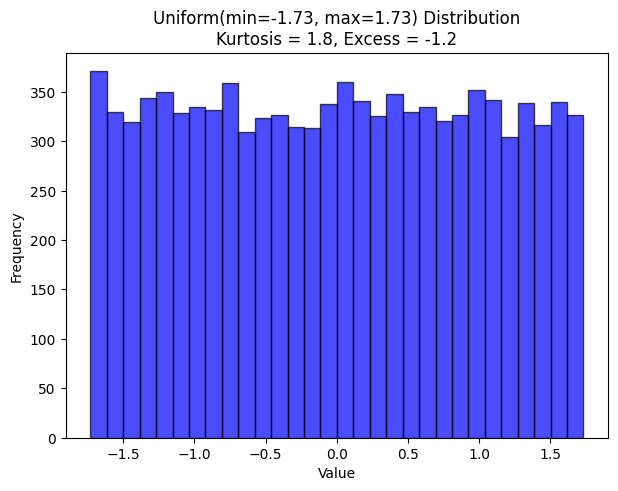

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# Parameters for the Uniform distribution
low, high = -np.sqrt(3), np.sqrt(3)

# Number of samples
samples = 10000

# Generate Uniform distribution data
uniform_data = np.random.uniform(low, high, samples)

# Calculate kurtosis
uniform_kurtosis = kurtosis(uniform_data, fisher=False)
excess_kurtosis = uniform_kurtosis - 3  # Excess kurtosis is kurtosis minus 3

print(f"Uniform(min={low:.2f}, max={high:.2f}) kurtosis = {uniform_kurtosis:.1f}, excess = {excess_kurtosis:.1f}")

# Plotting the histogram
plt.figure(figsize=(7, 5))
plt.hist(uniform_data, bins=30, edgecolor='black', alpha=0.7, color='blue')
plt.title(f'Uniform(min={low:.2f}, max={high:.2f}) Distribution\nKurtosis = {uniform_kurtosis:.1f}, Excess = {excess_kurtosis:.1f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


**Simulation for Kurtosis of Different Distributions**

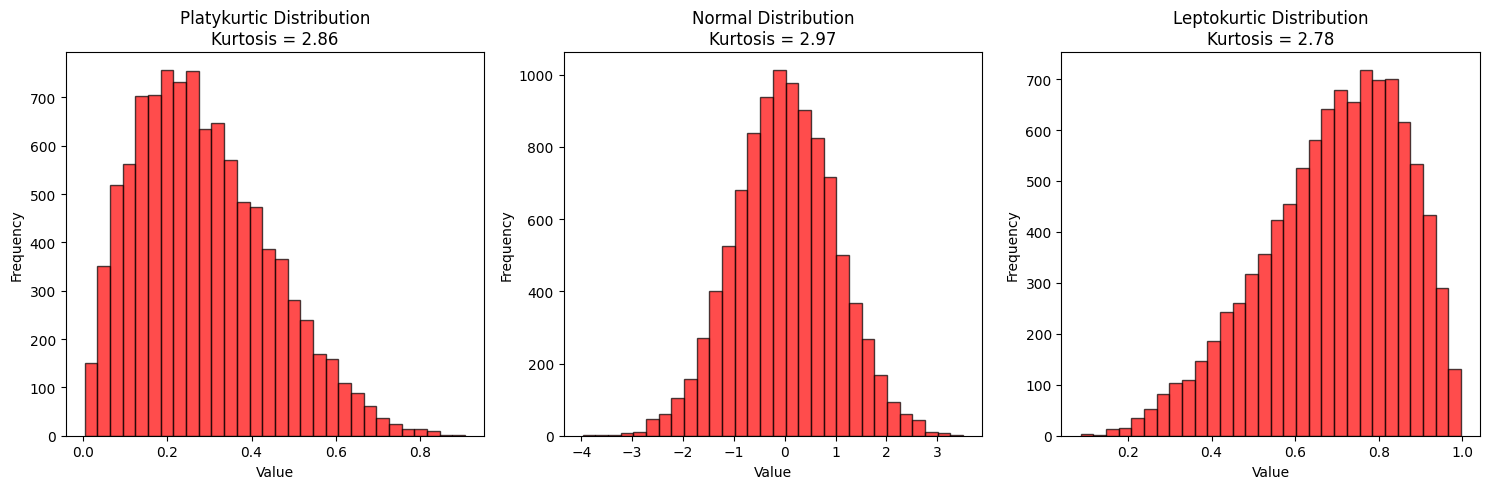

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, norm, beta

# Generate data for Platykurtic distribution
platykurtic_data = beta.rvs(2, 5, size=10000)

# Generate data for Normal distribution
normal_data = np.random.normal(0, 1, 10000)

# Generate data for Leptokurtic distribution
leptokurtic_data = beta.rvs(4.5, 2, size=10000)

# Calculate kurtosis
platykurtic_kurtosis = kurtosis(platykurtic_data, fisher=False)
normal_kurtosis = kurtosis(normal_data, fisher=False)
leptokurtic_kurtosis = kurtosis(leptokurtic_data, fisher=False)

# Plot Platykurtic distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(platykurtic_data, bins=30, edgecolor='black', alpha=0.7, color='red')
plt.title(f'Platykurtic Distribution\nKurtosis = {platykurtic_kurtosis:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot Normal distribution
plt.subplot(1, 3, 2)
plt.hist(normal_data, bins=30, edgecolor='black', alpha=0.7, color='red')
plt.title(f'Normal Distribution\nKurtosis = {normal_kurtosis:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot Leptokurtic distribution
plt.subplot(1, 3, 3)
plt.hist(leptokurtic_data, bins=30, edgecolor='black', alpha=0.7, color='red')
plt.title(f'Leptokurtic Distribution\nKurtosis = {leptokurtic_kurtosis:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Applications of Measures of Shape**

#### Theoretical/Simulation Example: Application of Moments in Financial Risk Management

#### Question:
A financial analyst is studying the returns of a stock, which are modeled as a random variable \( R \) with an unknown distribution. The analyst is interested in understanding the risk associated with the stock returns by calculating higher-order moments (up to the fourth moment). Specifically, the analyst wants to compute the skewness and kurtosis of the stock returns to assess the asymmetry and tail heaviness of the return distribution.

Given a historical dataset of stock returns, use simulations to estimate the skewness and kurtosis of the stock returns. Additionally, provide a theoretical explanation of how skewness and kurtosis can help in risk management.

#### Solution:

1. **Theoretical Explanation**:
   - **Skewness**: Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean. Negative skewness indicates a distribution with an asymmetric tail extending towards more negative values, and positive skewness indicates a distribution with an asymmetric tail extending towards more positive values.
   - **Kurtosis**: Kurtosis measures the "tailedness" of the probability distribution. High kurtosis indicates a distribution with heavy tails and a sharp peak, while low kurtosis indicates a distribution with light tails and a flatter peak.

   Understanding skewness and kurtosis helps financial analysts identify potential risks:
   - Negative skewness can indicate a higher probability of extreme negative returns, which is important for risk management.
   - High kurtosis signals the potential for extreme values (both positive and negative), indicating higher risk.


2. **Simulation Solution**:

Sample Skewness: -0.0013503465339436685
Sample Kurtosis: 2.994369446260187


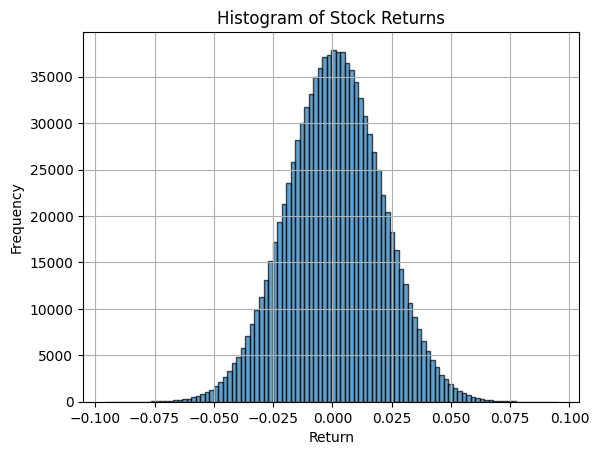

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Generate synthetic stock returns data
np.random.seed(42)  # For reproducibility
sample_size = 1000000
mean_return = 0.001  # Mean daily return
std_dev_return = 0.02  # Standard deviation of daily return

# Generate random stock returns using a normal distribution
returns = np.random.normal(mean_return, std_dev_return, sample_size)

# Calculate higher-order moments
sample_skewness = skew(returns)
sample_kurtosis = kurtosis(returns, fisher=False)

print(f"Sample Skewness: {sample_skewness}")
print(f"Sample Kurtosis: {sample_kurtosis}")

# Plotting the histogram of returns
plt.hist(returns, bins=100, edgecolor='black', alpha=0.7)
plt.title('Histogram of Stock Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### 4.12 Meaning of moments
#### Parameters meanings:
- measures of central tendancy:<br>
$\;\;\;\;\;\;$-mean :$\;\;\;\;\;\;$  $ E[X] = \sum_{\forall i} x_{i}p_{i}$<br>
$\;\;\;\;\;\;$-mode : value corresponding to the highest probability; <br>
$\;\;\;\;\;\;$-median : value that equally separates weights of the distribution<br>
- measures of variability:<br>
$\;\;\;\;\;\;$-variance: $\;\;\;\;\;\;$$V[X] = 𝐸[(𝑋 − 𝐸[𝑋])^{2}]$<br>
$\;\;\;\;\;\;$-standard deviation:$\;\;\;\;\;\;$$\sqrt{𝑉[𝑋]}$<br>
$\;\;\;\;\;\;$-squared coefficient of variation(squared COV):<br>
- other measures:<br>
$\;\;\;\;\;\;$-skewness of distribution: skewness<br>
$\;\;\;\;\;\;$-excess of the mode: excess<br>

**Note**: not all parameters exist for a given distribution!<br>
Pareto distribution has no mean when $\alpha \leqslant 1$<br>
Pareto distribution has no variance when $\alpha\in(1,2]$<br>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta, expon, skew, kurtosis
import ipywidgets as widgets
from ipywidgets import interact

def plot_distribution(distribution):
    np.random.seed(42)
    plt.figure(figsize=(10, 6))

    if distribution == 'Bimodal (-1, 2)':
        data1 = np.random.normal(loc=-1, scale=0.5, size=500)
        data2 = np.random.normal(loc=2, scale=0.5, size=500)
        data = np.concatenate([data1, data2])
        x = np.linspace(-4, 6, 100)
        p1 = norm.pdf(x, -1, 0.5)
        p2 = norm.pdf(x, 2, 0.5)
        plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
        plt.plot(x, p1, 'k', linewidth=2)
        plt.plot(x, p2, 'k', linewidth=2)
        plt.title('Bimodal Distribution (-1, 2)')

    elif distribution == 'Bimodal (-2, 3)':
        data1 = np.random.normal(loc=-2, scale=0.5, size=500)
        data2 = np.random.normal(loc=3, scale=0.5, size=500)
        data = np.concatenate([data1, data2])
        x = np.linspace(-6, 6, 100)
        p1 = norm.pdf(x, -2, 0.5)
        p2 = norm.pdf(x, 3, 0.5)
        plt.hist(data, bins=30, density=True, alpha=0.6, color='b')
        plt.plot(x, p1, 'k', linewidth=2)
        plt.plot(x, p2, 'k', linewidth=2)
        plt.title('Bimodal Distribution (-2, 3)')

    elif distribution == 'Skewed':
        a, b = 2, 5
        data = np.random.beta(a=a, b=b, size=1000)
        x = np.linspace(0, 1, 100)
        p = beta.pdf(x, a, b)
        plt.hist(data, bins=30, density=True, alpha=0.6, color='r')
        plt.plot(x, p, 'k', linewidth=2)
        plt.title('Skewed Distribution')

    elif distribution == 'Exponential':
        data = np.random.exponential(scale=1, size=1000)
        x = np.linspace(0, 6, 100)
        p = expon.pdf(x, scale=1)
        plt.hist(data, bins=30, density=True, alpha=0.6, color='c')
        plt.plot(x, p, 'k', linewidth=2)
        plt.title('Exponential Distribution')

    mean = np.mean(data)
    variance = np.var(data)
    skewness = skew(data)
    kurt = kurtosis(data)

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurt}")

# Create an interactive widget
interact(plot_distribution, distribution=['Bimodal (-1, 2)', 'Bimodal (-2, 3)', 'Skewed', 'Exponential']);


interactive(children=(Dropdown(description='distribution', options=('Bimodal (-1, 2)', 'Bimodal (-2, 3)', 'Ske…

## Theorem: Continuous Tail Sum Formula

**Theorem 4.1 (Continuous Tail Sum Formula):** Let $ X $ be a non-negative random variable. Then
$ E(X) = \int_0^\infty (1 - F_X(x)) \, dx $

**Proof:** (Refer to the provided slide)

We'll illustrate this theorem using an exponential distribution with the probability density function (PDF):
$ f_X(x) = \lambda e^{-\lambda x} $

and cumulative distribution function (CDF):
$ F_X(x) = 1 - e^{-\lambda x} $

**Simulation:**

Let's verify this theorem through simulation and calculate $ E(X) $ using both the definition of expected value and the continuous tail sum formula.


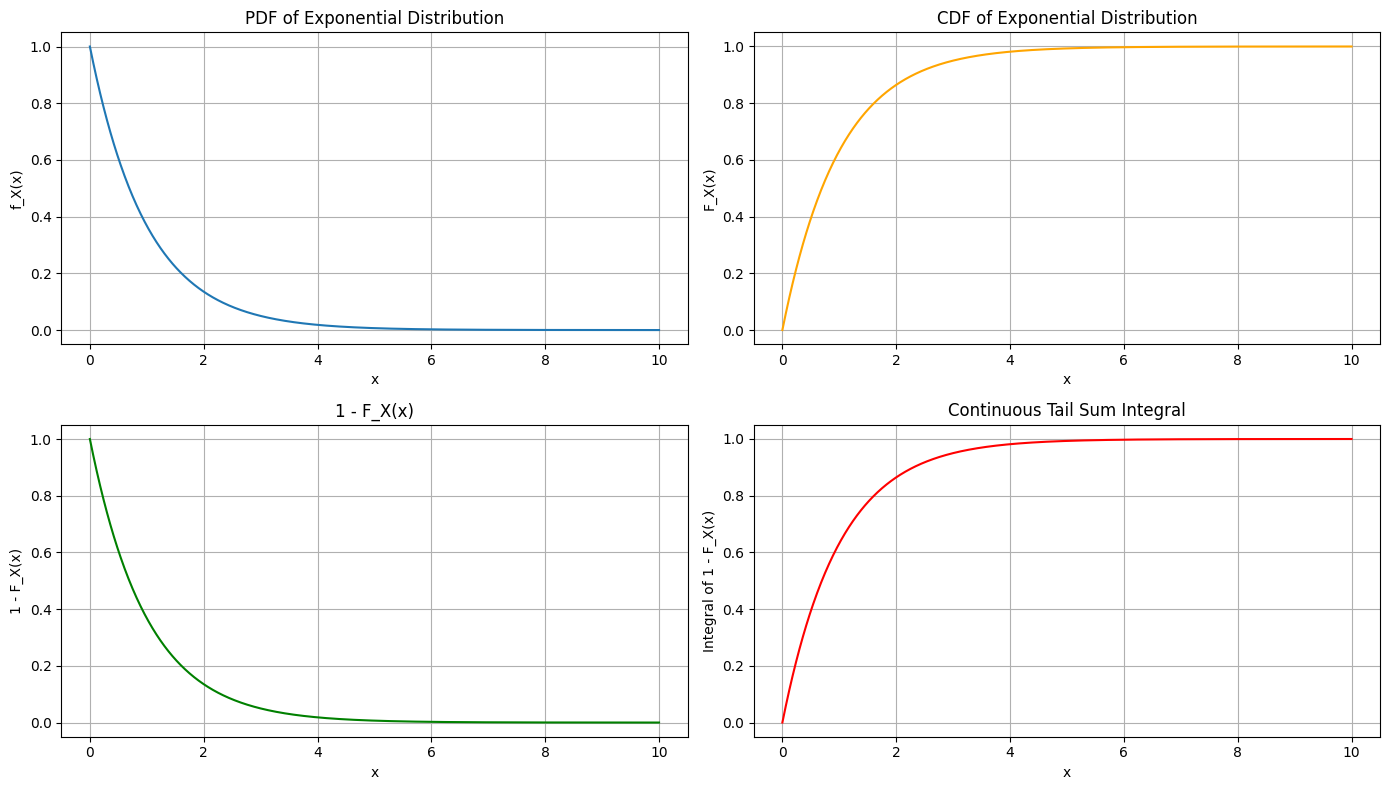

Expected value using definition: 0.9994922473776023
Expected value using continuous tail sum formula: 0.9999629497022364


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
lambda_param = 1.0  # Rate parameter for the exponential distribution

# Define the exponential PDF and CDF
def pdf_exp(x, lambda_param):
    return lambda_param * np.exp(-lambda_param * x)

def cdf_exp(x, lambda_param):
    return 1 - np.exp(-lambda_param * x)

# Generate data for visualization
x_values = np.linspace(0, 10, 1000)
pdf_values = pdf_exp(x_values, lambda_param)
cdf_values = cdf_exp(x_values, lambda_param)
tail_integral = [np.trapz(1 - cdf_exp(x_values[:i], lambda_param), x_values[:i]) for i in range(1, len(x_values)+1)]

# Calculate expected value using the definition
expected_value_def = np.trapz(x_values * pdf_values, x_values)

# Calculate expected value using the continuous tail sum formula
expected_value_tail_sum = np.trapz(1 - cdf_values, x_values)

# Plot the PDF, CDF, and the continuous tail sum integral
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(x_values, pdf_values, label='PDF')
plt.title('PDF of Exponential Distribution')
plt.xlabel('x')
plt.ylabel('f_X(x)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(x_values, cdf_values, label='CDF', color='orange')
plt.title('CDF of Exponential Distribution')
plt.xlabel('x')
plt.ylabel('F_X(x)')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(x_values, 1 - cdf_values, label='1 - F_X(x)', color='green')
plt.title('1 - F_X(x)')
plt.xlabel('x')
plt.ylabel('1 - F_X(x)')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(x_values, tail_integral, label='Tail Integral', color='red')
plt.title('Continuous Tail Sum Integral')
plt.xlabel('x')
plt.ylabel('Integral of 1 - F_X(x)')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Expected value using definition: {expected_value_def}")
print(f"Expected value using continuous tail sum formula: {expected_value_tail_sum}")
